&#x1F465; Group C:

Manoranjani Navamani Kathiresan Kulanthaivel

Brice Setra Robert


### &#x1F4D1; Assignment 2

&#x1F518; 1. Use a moving average filer over 100 samples to extract the large scale fading from the power measurements (Hint: have a look at the function smooth). Substract the large scale fading from the measurements to get the small scale fading. Plot the measurements as well as the two extracted fading processes vs time in the same figure

In [1]:
## Receive the signal
include("./data/measurements.jl");

In [2]:
# Vectorize the Matlab's data to Julia's format
H₂, rxₚₒᵥᵥₑᵣ = vec(H2), vec(rx_power_dBm);     

In [3]:
using Plots, Statistics

In [4]:
N = 100 # Windows Size
𝖤 = mean # Expected Value

mean (generic function with 9 methods)

In signal processing, a moving average filter is used to smooth out variations in a signal by averaging neighboring data points. It's commonly used for noise reduction and to highlight underlying trends in the data.

The formula:

$ F[i] = \text{𝖤}\left( \text{rx}[ \max(1, i-N+1): i ] \right) $

captures the essence of a moving average filter operation. It computes the mean (average) of a sliding window of data points from the input signal $ rx $, where the window size is defined by $ N $. This mean value represents the output of the moving average filter at each index $ i $, providing a smoothed version of the original signal.

In [5]:
# Moving Average Filter 
𝖥 = [ 𝖤( rxₚₒᵥᵥₑᵣ[ max(1, i-N+1): i ] ) for i in 1:length(rxₚₒᵥᵥₑᵣ) ];

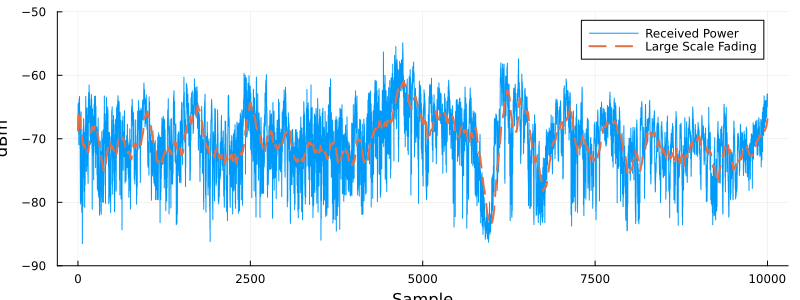

In [6]:
# Plotting
plot(rxₚₒᵥᵥₑᵣ
    , label="Received Power"
    , xlabel="Sample", ylabel="dBm"
    , linewidth=1
    , size = (800,300)
    , ylims = (-90, -50)
)
plot!(𝖥
    , label="Large Scale Fading"
    , linewidth=2
    , linestyle=:dash
)

&#x1F518; 2. Plot a histogram of the large scale fading (on a log scale). Compute the mean and the vari- ance and overlay the histogram with the pdf of a lognormal
distribution of those parameters (Hint: have a look at function histfit). Discuss the result.


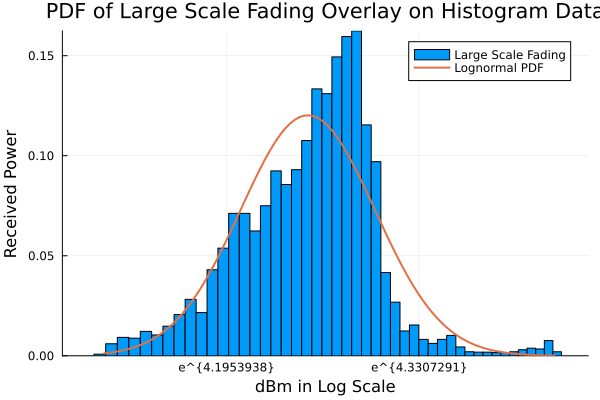

In [7]:
using Plots
using StatsBase
using Distributions

# Create histogram
histogram(-𝖥, bins=100
    , xscale=:ln
    , normed=true
    , label="Large Scale Fading"
)

# Fit lognormal distribution to data
fit_lognormal = Distributions.fit_mle(LogNormal, -𝖥)

# Overlay histogram with PDF of lognormal distribution
𝑋 = exp.(range(log(minimum(-𝖥)), log(maximum(-𝖥)), length=100))
pdf_lognormal = pdf(fit_lognormal, 𝑋)
plot!(𝑋, pdf_lognormal, linewidth=2, label="Lognormal PDF")


# Add labels and title
xlabel!("dBm in Log Scale")
ylabel!("Received Power")
title!("PDF of Large Scale Fading Overlay on Histogram Data")


&#x1F518; 3. Plot a histogram of the small scale fading and and overlay the histogram with the pdf of a Rayleigh, a Ricean and a Nakagami distribution (Hint: have a look at function histfit). Discuss the results.

In [8]:
include("distributions/Nakagami.jl")

fit_mle (generic function with 62 methods)

In [9]:
using Plots
using Distributions
using SpecialFunctions  # Add this to access the gamma function

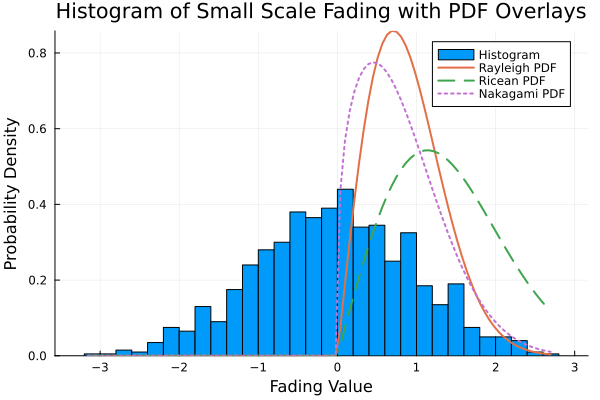

In [10]:
# Generate or import your small scale fading data
# Example: fadingData = randn(1000); # Replace this with your actual data
fadingData = randn(1000);

# Plot the histogram of the fading data
histogram(fadingData, normalize=true, bins=50, label="Histogram", legend=:topright)

# Fit Rayleigh distribution
rayleighDist = fit_mle(Rayleigh, fadingData)
x_values = range(minimum(fadingData), stop=maximum(fadingData), length=100)
pdf_rayleigh = pdf(rayleighDist, x_values)
plot!(x_values, pdf_rayleigh, label="Rayleigh PDF", linewidth=2)

# Fit Ricean distribution
# Using a rough approximation for initial parameters
s = sqrt(mean(fadingData.^2)/2) # Approximate s
σ = std(fadingData) # Approximate σ
riceanDist = Rician(s, σ)
pdf_ricean = pdf(riceanDist, x_values)
plot!(x_values, pdf_ricean, label="Ricean PDF", linewidth=2, linestyle=:dash)

# Fit Nakagami distribution
nakagamiDist = fit_mle(Nakagami, fadingData)
pdf_nakagami = pdf(nakagamiDist, x_values)
plot!(x_values, pdf_nakagami, label="Nakagami PDF", linewidth=2, linestyle=:dot)

# Customize the plot
title!("Histogram of Small Scale Fading with PDF Overlays")
xlabel!("Fading Value")
ylabel!("Probability Density")

&#x1F518; 4. Using the original time-variant transfer function H2, calculate and plot the power delay profile making sure you label the axes correctly. Further compute the total power, the average mean delay, the average rms delay spread, and the coherence bandwidth. Explain how you calculated each value and discuss the results.

For Task4:

H2 50x10000
- ifft(time domain)
- abs
- convert to DB 20 * log10 ()
- take the average
- sample/sampling rate (to convert sample to time)

<img src=images/task4_plot.png width='' height='' > </img>